# Waveform evolution plot of $|\tilde{h}_+(f)|$

In [1]:
import numpy as np
import bilby
import logging
logging.getLogger('bilby').setLevel(logging.WARNING) # Or logging.ERROR
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

## Short Inspiral: GW150914-like signal

In [2]:
injection_parameters = dict(mass_1 = 38.21699758702877, mass_2 = 32.20969716505654, eccentricity=0.1, a_1 = 0.4338995320657293, a_2 = 0.39888934269976206, tilt_1 = 1.6906449109686164, tilt_2 = 1.7730966571159301, phi_12 = 3.0382959521018726, phi_jl = 1.6881815480645899, luminosity_distance = 455.61617115135334, dec = -1.2190750471909269, ra = 1.7368337508407308, theta_jn = 2.69058100030177, psi = 1.4777795108631158, phase = 3.4883939708111518, geocent_time = 1126259462.410206)

time_of_event = 1126259642.413
post_trigger_duration = 1.
duration = 4.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 2048.

minimum_frequency = 20.0
maximum_frequency = 128.0

In [3]:
############# TF2Ecck waveform model ################
waveform_arguments = dict(waveform_approximant='TaylorF2Ecck',
                          reference_frequency=20., minimum_frequency=20.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

In [4]:
############# TF2Ecch waveform model ################
waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecch',
                          reference_frequency=20., minimum_frequency=20.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos2:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

In [5]:
############# TF2Ecc waveform model ################
waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_tidal_order=0)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments3)

minimum_frequency = 20.0
maximum_frequency = 128.0

ifos3 = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos3:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

In [6]:
############# TaylorF2 waveform model ################
waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_amplitude_order=0, pn_tidal_order=0)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments4)

minimum_frequency = 20.0
maximum_frequency = 128.0

ifos4 = bilby.gw.detector.InterferometerList(['L1', 'H1'])
for ifo in ifos4:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

In [7]:
#to plot the frequency domain  
############# TF2Ecck waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
L1 = ifos[0]
L1_injection = injection[0]
idxs = L1.strain_data.frequency_mask  

############# TF2Ecch ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)
L12 = ifos2[0]
L1_injection2 = injection2[0]
idxs2 = L12.strain_data.frequency_mask

############# TF2Ecc ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters)
L13 = ifos3[0]
L1_injection3 = injection3[0]
idxs3 = L13.strain_data.frequency_mask

############# TF2 ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters)
L14 = ifos4[0]
L1_injection4 = injection4[0]
idxs4 = L14.strain_data.frequency_mask

00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.
00:41 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259462.410206.


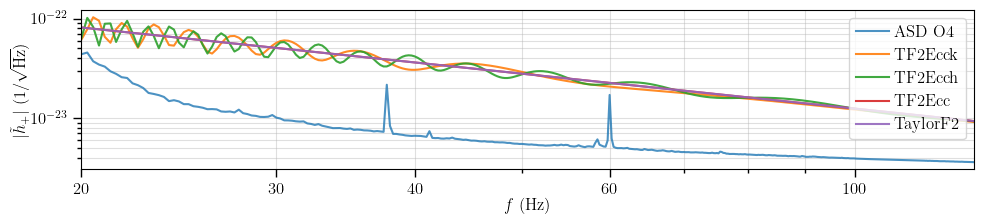

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
#############################
fig, ax = plt.subplots(1, 1, facecolor='w', figsize=(10, 2.4))

#############################
ax.loglog(L1.frequency_array[idxs],
          L1.amplitude_spectral_density_array[idxs],
          label="ASD O4", alpha=0.8)
#############################

ax.loglog(L1.frequency_array[idxs],
          np.abs(L1_injection["plus"][idxs]),
          label="TF2Ecck", alpha=0.9)

#############################
ax.loglog(L12.frequency_array[idxs2],
          np.abs(L1_injection2["plus"][idxs2]),
          label="TF2Ecch", alpha=0.9)

#############################
ax.loglog(L13.frequency_array[idxs3],
          np.abs(L1_injection3["plus"][idxs3]),
          label="TF2Ecc", alpha=0.9)

#############################
ax.loglog(L14.frequency_array[idxs4],
          np.abs(L1_injection4["plus"][idxs4]),
          label="TaylorF2", alpha=0.9)



ax.set_xlim(20.,128.)
# ax.set_ylim(1e-23,2e-23)
ax.set_xscale('log')
# fig.set_size_inches(12, 3)
ax.set_xlabel(r"$f$ (Hz)", labelpad=0.0, fontsize=12)
ax.set_ylabel(r"$|\tilde{h}_+|$ (1/$\sqrt{\rm Hz}$)", labelpad=1.0, fontsize=12)

# Customize x-axis tick labels
plt.xticks([20, 30, 40, 60, 100], ['20', '30', '40', '60', '100'])

# Add a gray box behind the legend
legend = ax.legend(loc="upper right", bbox_to_anchor=(1, 1), facecolor='w', framealpha=0.8, frameon=True) 
legend.get_frame().set_facecolor('w')
legend.get_frame().set_alpha(0.8)
for text in legend.get_texts():
    text.set_color("k")

ax.grid(True, which="both", ls="-", alpha=0.4)
fig.set_size_inches(10, 2.4)
fig.tight_layout()
fig.savefig("amplitude_sanity_test_non_zero_e0_low_mass_BBH.pdf")
plt.show()

## Long Inspiral: GW170817-like signal

In [9]:
injection_parameters = {'mass_1':1.61, 'mass_2':1.18, 'eccentricity':0.1, 'a_1':0., 'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':38.87, 'theta_jn':2.52, 'psi':3.293627, 'phase':0., 'geocent_time':1246527184.169434, 'ra':3.45, 'dec':-0.41,}


time_of_event = 1246527184.169434
post_trigger_duration = 1.
duration = 256.
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 4096.

minimum_frequency = 20.0
maximum_frequency = 1024.0

In [10]:
############# TF2Ecck waveform model ################
waveform_arguments = dict(waveform_approximant='TaylorF2Ecck',
                          reference_frequency=20., minimum_frequency=20.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

############# TF2Ecch waveform model ################
waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecch',
                          reference_frequency=20., minimum_frequency=20.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos2:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

############# TF2Ecc waveform model ################
waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_tidal_order=0)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['L1', 'L1'])
for ifo in ifos3:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

############# TaylorF2 waveform model ################
waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_amplitude_order=0, pn_tidal_order=0)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments4)

ifos4 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos4:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)


In [11]:
############# TF2Ecck waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
L1 = ifos[1]
L1_injection = injection[1]
idxs = L1.strain_data.frequency_mask  

############# TF2Ecch ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)
L12 = ifos2[1]
L1_injection2 = injection2[1]
idxs2 = L12.strain_data.frequency_mask

############# TF2Ecc ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters)
L13 = ifos3[1]
L1_injection3 = injection3[1]
idxs3 = L13.strain_data.frequency_mask

############# TF2 ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters)
L14 = ifos4[1]
L1_injection4 = injection4[1]
idxs4 = L14.strain_data.frequency_mask

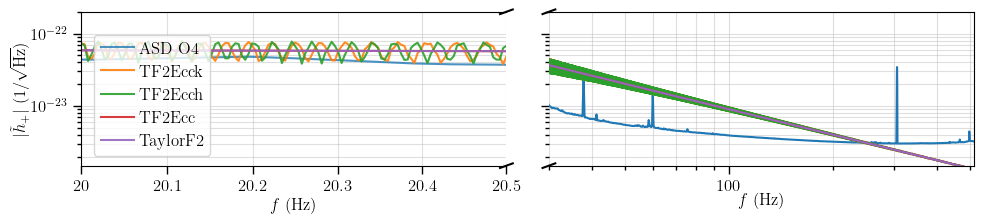

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
# Create the figure and subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(10, 2.4))

# Plot data on the first axis (20 to 21 Hz)
ax1.loglog(L1.frequency_array[idxs],
           L1.amplitude_spectral_density_array[idxs],
           label="ASD O4", alpha=0.8)
ax1.loglog(L1.frequency_array[idxs],
           np.abs(L1_injection["plus"][idxs]),
           label="TF2Ecck", alpha=0.9)
ax1.loglog(L12.frequency_array[idxs2],
           np.abs(L1_injection2["plus"][idxs2]),
           label="TF2Ecch", alpha=0.9)
ax1.loglog(L13.frequency_array[idxs3],
           np.abs(L1_injection3["plus"][idxs3]),
           label="TF2Ecc", alpha=0.9)
ax1.loglog(L14.frequency_array[idxs4],
           np.abs(L1_injection4["plus"][idxs4]),
           label="TaylorF2", alpha=0.9)

# Plot data on the second axis (100 to 1024 Hz)
ax2.loglog(L1.frequency_array[idxs],
           L1.amplitude_spectral_density_array[idxs])
ax2.loglog(L1.frequency_array[idxs],
           np.abs(L1_injection["plus"][idxs]))
ax2.loglog(L12.frequency_array[idxs2],
           np.abs(L1_injection2["plus"][idxs2]))
ax2.loglog(L13.frequency_array[idxs3],
           np.abs(L1_injection3["plus"][idxs3]))
ax2.loglog(L14.frequency_array[idxs4],
           np.abs(L1_injection4["plus"][idxs4]))

# Set x-axis limits for each subplot
ax1.set_xlim(20, 20.5)
ax2.set_xlim(30, 512.0)

# Set y-axis scale
ax1.set_ylim(1.5e-24, 2e-22)  # Adjust limits as needed for visibility
# ax1.set_xscale('log')
# ax2.set_xscale('log')

# Set labels and legends
ax1.set_xlabel(r"$f$ (Hz)", labelpad=2.0, fontsize=12)
ax2.set_xlabel(r"$f$ (Hz)", labelpad=-1.0, fontsize=12)
ax1.set_ylabel(r"$|\tilde{h}_+|$ (1/$\sqrt{\rm Hz}$)", labelpad=1.0, fontsize=12)
    
ax1.grid(True, which="both", ls="-", alpha=0.4)
ax2.grid(True, which="both", ls="-", alpha=0.4)

# Add a "break" between the axes
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
#ax2.tick_params(labelright='off')
#ax2.yaxis.tick_right()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

# Customize x-axis tick labels
# plt.xticks([20, 30, 40, 60, 100], ['20', '30', '40', '60', '100'])
ax1.set_xticks([20, 20.1, 20.2, 20.3, 20.4, 20.5], ['20', '20.1', '20.2', '20.3', '20.4', '20.5'])
ax2.set_xticks([100], ['100'])

# Add a gray box behind the legend
legend = ax1.legend(loc="lower left", bbox_to_anchor=(0.01, 0.01), facecolor='w', framealpha=0.8, frameon=True) #added frameon=True and adjusted bbox_to_anchor.
legend.get_frame().set_facecolor('w')
legend.get_frame().set_alpha(0.8)
for text in legend.get_texts():
    text.set_color("k")

#fig.set_size_inches(10, 2.4)
# Adjust layout to ensure labels are visible
fig.tight_layout()
# Adjust the layout and save
fig.subplots_adjust(wspace=0.1)

fig.savefig("amplitude_sanity_test_non_zero_e0_BNS_kink.pdf")
plt.show()